# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
housing = pd.read_csv("boston_data.csv")
display(housing.head())
housing.shape

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


(404, 14)

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
# dropping irrelevant column

housing.drop("nox", axis=1, inplace=True)

In [5]:
# If dropping outliers - drops about 100 rows, so TBD

"""
outlier_indices = []

for col in housing.columns:
    q1 = housing[col].quantile(0.10)
    q3 = housing[col].quantile(0.90)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = housing[(housing[col] < lower_bound) | (housing[col] > upper_bound)]
    outlier_indices.extend(outliers.index)
    

# Get unique indices of outliers across columns
unique_outliers = list(set(outlier_indices))

# DataFrame containing rows with outliers across columns
outliers_df = housing.loc[unique_outliers]

housing = housing.drop(unique_outliers)
housing.shape
"""

'\noutlier_indices = []\n\nfor col in housing.columns:\n    q1 = housing[col].quantile(0.10)\n    q3 = housing[col].quantile(0.90)\n    iqr = q3 - q1\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n\n    outliers = housing[(housing[col] < lower_bound) | (housing[col] > upper_bound)]\n    outlier_indices.extend(outliers.index)\n    \n\n# Get unique indices of outliers across columns\nunique_outliers = list(set(outlier_indices))\n\n# DataFrame containing rows with outliers across columns\noutliers_df = housing.loc[unique_outliers]\n\nhousing = housing.drop(unique_outliers)\nhousing.shape\n'

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

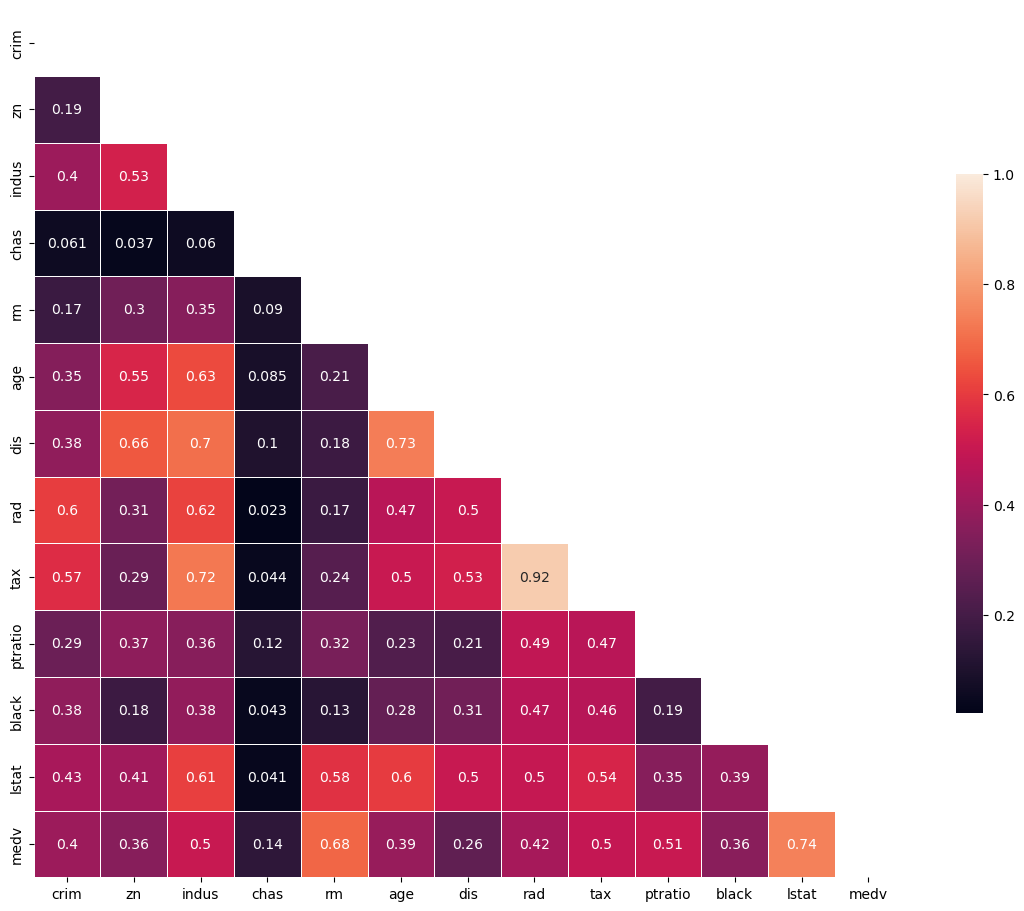

In [6]:
# Checking correlation score

import seaborn as sns

corr=np.abs(housing.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

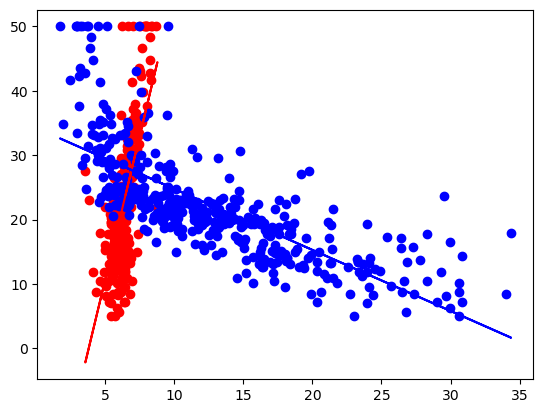

In [7]:
# Scatter plot with the features with highest correlation

x = ["rm", "lstat"]
y = housing["medv"]
colors = ['red', 'blue']

for i,col in enumerate(x):
    plt.scatter(housing[col], y, color=colors[i])
    
    # Perform linear regression
    x = housing[col]
    y = y
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    plt.plot(x, polynomial(x), label=f'Fit for {col}', color=colors[i])

plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [8]:
# "rm" (red): there is positive correlation. 
# "lstat" (blue):  there is negative correlation,

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [9]:
# Heatmap - already done above.
# Variables with low correlation - those with correlation score lower than 0.5 (crim, zn, indus, age, dis, rad, tax, black)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [10]:
min(housing["medv"])

5.0

In [11]:
max(housing["medv"])

50.0

In [12]:
np.mean(housing["medv"])

22.312376237623763

In [13]:
np.median(housing["medv"])

21.4

In [14]:
np.std(housing["medv"])

8.82607496591717

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [15]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict) 

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [16]:
from sklearn.model_selection import train_test_split

X = housing[["rm","lstat"]]
y = housing["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [17]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
depth = [2,3,4,6,8,10]
result = {}

for i in depth:
    
    list=[]
    rf_regressor = RandomForestRegressor(max_depth=i, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    y_predict = rf_regressor.predict(X_train)
    score = r2_score(y_train, y_predict) 
    list.append(score)
    mse = mean_squared_error(y_train, y_predict)
    rmse = np.sqrt(mse)
    list.append(rmse)
    
    y_predict = rf_regressor.predict(X_test)
    score = r2_score(y_test, y_predict) 
    list.append(score)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    list.append(rmse)
    
    result[i]=list
    print(str(i),":","train_score",result[i][0],"train_rmse", result[i][1],"test_score",result[i][2],"test_rmse",result[i][3]) 

2 : train_score 0.7795074147068264 train_rmse 4.329051511246003 test_score 0.5952780471041699 test_rmse 4.372194317819307
3 : train_score 0.828245253698483 train_rmse 3.820763289120222 test_score 0.6420610551033923 test_rmse 4.111739114020512
4 : train_score 0.8630370185939765 train_rmse 3.4119083699326147 test_score 0.6376369248242143 test_rmse 4.137071652768302
6 : train_score 0.9177726042175167 train_rmse 2.6436504229176845 test_score 0.6125530392912408 test_rmse 4.277866267215944
8 : train_score 0.9436005774928526 train_rmse 2.1894401969914705 test_score 0.6089604738927524 test_rmse 4.297653559837005
10 : train_score 0.95411844988918 train_rmse 1.974762173610236 test_score 0.6085055979186 test_rmse 4.300152451945496


Now, plot the score for each tree on the training set and on the testing set.

In [19]:
# Produce a plot with the score for the testing and training for the different max depths

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [20]:
# Increasing the max_depth is effective to reduce errors in training data (almost no change for the test data).

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [21]:
# 1 - High Bias (Underfitting): Both training and testing errors are high.
# 10 - High Variance (Overfitting): Training error is low, but testing error is high.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [22]:
# 3 : added to above code.
# Comment : rmse for both train and test data slightly decreases and difference between the two rmses is smaller compared to 
# the results with higher max_depth.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [23]:
##Possible improvements includes : 
#Focus on data collected over the past 10 or 20 years.
#Add information such as distance to subway stations, construction materials and methods, number of rooms, facilities, etc.
#More fine-tuning of parameters to stabilize the model
#Eliminate bias in data collection areas (include RURAL)